 # Exercício 21
## Análise dos dados da COVID-19 Dataset
### Com base no dataset de dados da COVID-19:
JHU CSSE COVID-19 https://github.com/owid/covid-19-data/tree/master/public/data \
dataset wcota https://github.com/wcota/covid19br \
você deverá realizar uma análise exploratória e responder as seguintes perguntas utilizando Python.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt



df_covid = pd.read_csv('owid-covid-data.csv')
df_brasil_cases = pd.read_csv('cases-brazil-states.csv')

In [16]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

In [17]:
# Verificar valores nulos
print(df_covid.isnull().sum())

# Preencher ou remover valores nulos conforme necessário
df_covid.fillna(0, inplace=True)


iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 67, dtype: int64


In [18]:
# Ver as colunas do DataFrame
print(df_covid.columns)



Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [19]:
df_covid.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,4.294350e+05,4.294350e+05,4.294350e+05,4.294350e+05,429435.000000,429435.000000,429435.000000,429435.000000,429435.000000,429435.000000,...,429435.000000,429435.000000,429435.000000,429435.000000,429435.000000,4.294350e+05,4.294350e+05,429435.000000,429435.000000,429435.000000
mean,7.062901e+06,7.657486e+03,7.657058e+03,7.792336e+04,68.702046,68.695230,107493.947387,116.864846,116.854121,801.211211,...,18.791639,19.076374,2.103101,66.985354,0.536645,1.520336e+08,1.750335e+03,0.305000,0.341192,55.359319
std,4.387137e+07,2.244573e+05,8.454019e+04,4.323391e+05,1338.073082,501.728732,160424.384387,1474.745179,546.801451,1123.687099,...,19.437255,31.395775,2.551466,22.350205,0.340619,6.975408e+08,2.938492e+04,2.722678,4.737968,467.939271
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-2936.453100
25%,3.849000e+03,0.000000e+00,0.000000e+00,2.600000e+01,0.000000,0.000000,1266.277000,0.000000,0.000000,13.752000,...,0.000000,0.000000,0.000000,66.120000,0.000000,5.237980e+05,0.000000e+00,0.000000,0.000000,0.000000
50%,5.093700e+04,0.000000e+00,8.429000e+00,6.630000e+02,0.000000,0.000000,24205.084000,0.000000,1.933000,224.518000,...,16.600000,0.000000,1.380000,74.080000,0.660000,6.336393e+06,0.000000e+00,0.000000,0.000000,0.000000
75%,6.727790e+05,0.000000e+00,2.641430e+02,8.737000e+03,0.000000,2.714000,146788.850000,0.000000,49.494000,1231.202000,...,34.800000,25.383000,3.000000,78.920000,0.806000,3.296952e+07,0.000000e+00,0.000000,0.000000,0.000000
max,7.758668e+08,4.423623e+07,6.319461e+06,7.057132e+06,103719.000000,14817.000000,763598.600000,241758.230000,34536.890000,6601.110000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.349776e+06,78.080000,378.220000,10293.515000


### • Como foi a evolução mundial da COVID-19?


In [28]:
df_covid['date'] = pd.to_datetime(df_covid['date'])

# Agrupar por data e somar os casos e mortes
global_data = df_covid.groupby('date').agg({
    'total_cases': 'sum',
    'total_deaths': 'sum',
    'total_vaccinations': 'sum'
}).reset_index()



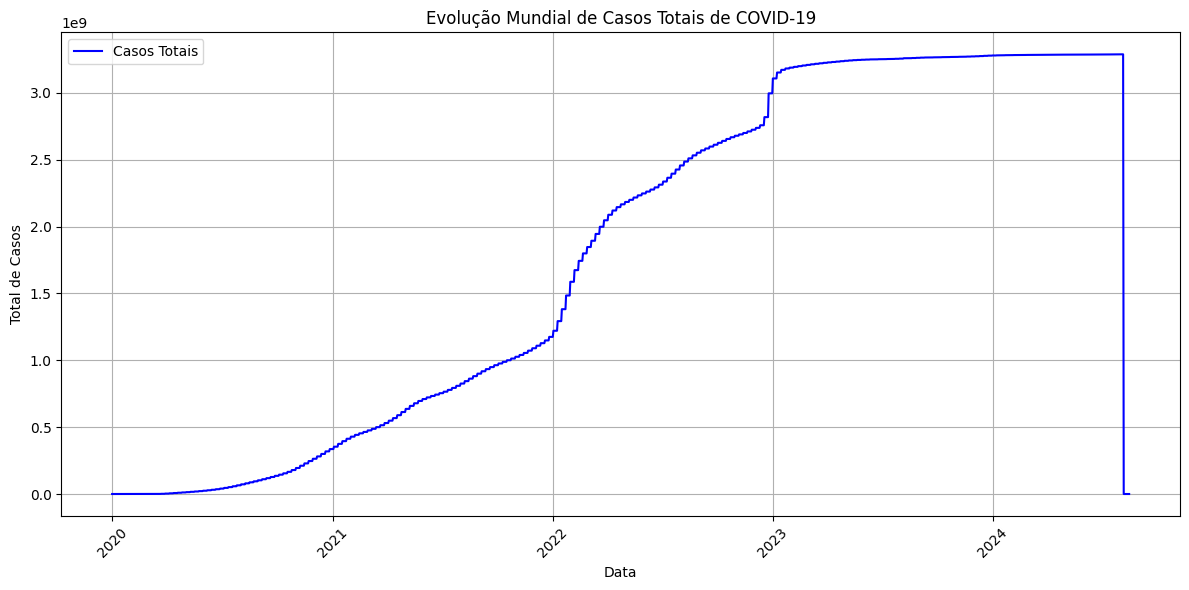

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(global_data['date'], global_data['total_cases'], label='Casos Totais', color='blue')
plt.title('Evolução Mundial de Casos Totais de COVID-19')
plt.xlabel('Data')
plt.ylabel('Total de Casos')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

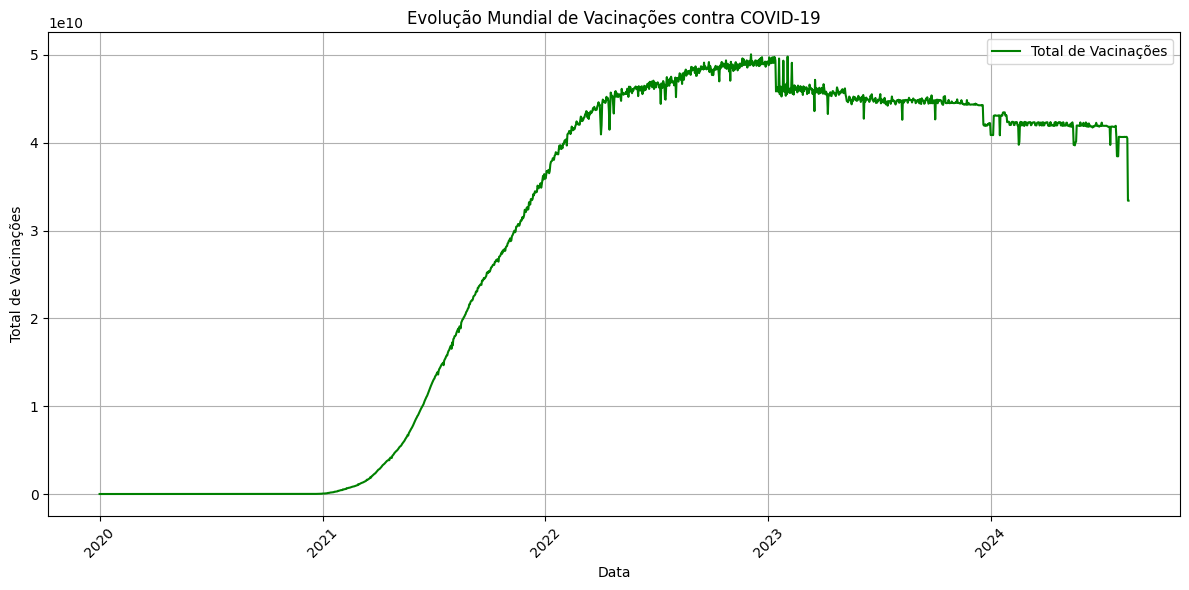

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(global_data['date'], global_data['total_vaccinations'], label='Total de Vacinações', color='green')
plt.title('Evolução Mundial de Vacinações contra COVID-19')
plt.xlabel('Data')
plt.ylabel('Total de Vacinações')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


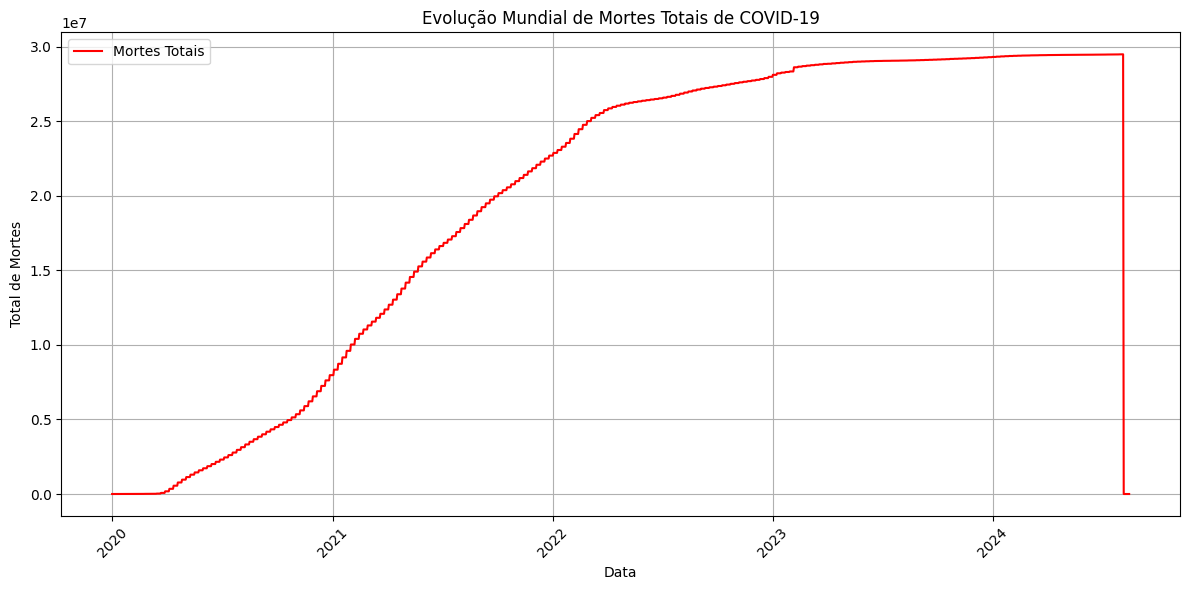

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(global_data['date'], global_data['total_deaths'], label='Mortes Totais', color='red')
plt.title('Evolução Mundial de Mortes Totais de COVID-19')
plt.xlabel('Data')
plt.ylabel('Total de Mortes')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


### • Quais são os 5 países com mais casos e mortes acumulados?


In [34]:
# Agrupar por país e somar casos e mortes
country_stats = df_covid.groupby('location').agg({
    'total_cases': 'sum',
    'total_deaths': 'sum'
}).reset_index()


In [35]:
# Classificar por casos totais
top_cases = country_stats.sort_values(by='total_cases', ascending=False).head(5)

# Classificar por mortes totais
top_deaths = country_stats.sort_values(by='total_deaths', ascending=False).head(5)


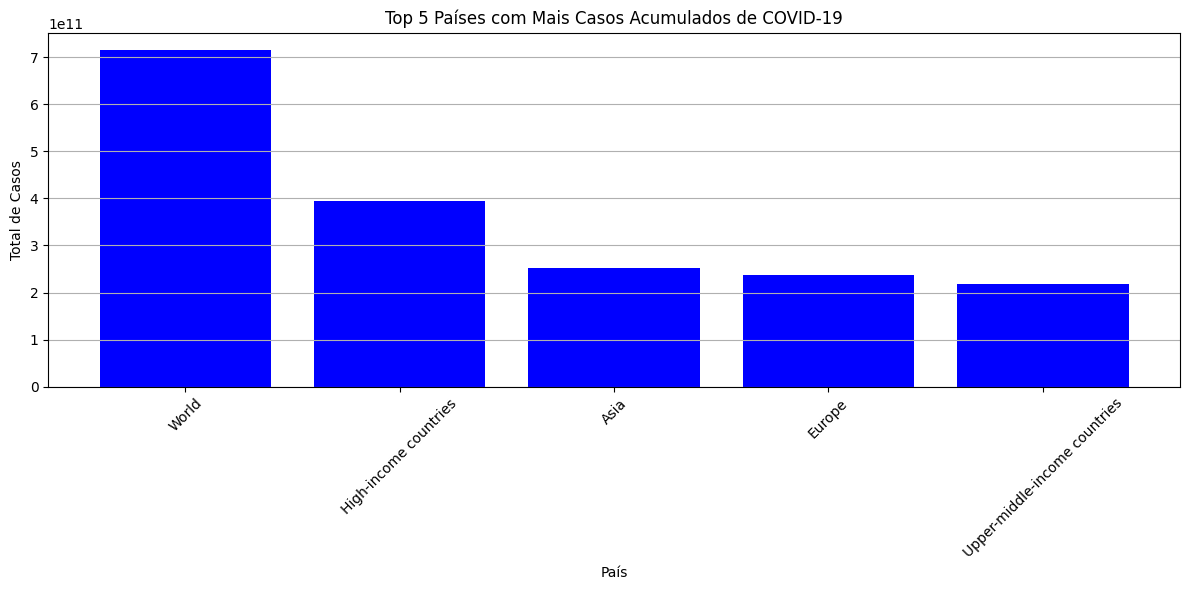

In [36]:
# Gráfico de Casos Totais
plt.figure(figsize=(12, 6))
plt.bar(top_cases['location'], top_cases['total_cases'], color='blue')
plt.title('Top 5 Países com Mais Casos Acumulados de COVID-19')
plt.xlabel('País')
plt.ylabel('Total de Casos')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

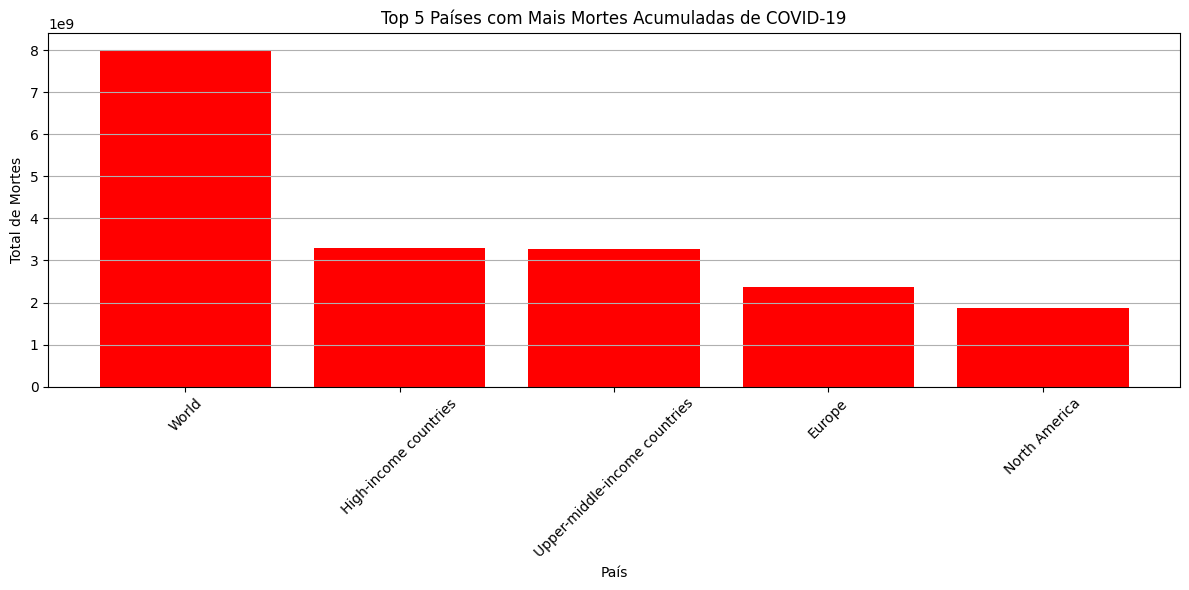

In [37]:
# Gráfico de Mortes Totais
plt.figure(figsize=(12, 6))
plt.bar(top_deaths['location'], top_deaths['total_deaths'], color='red')
plt.title('Top 5 Países com Mais Mortes Acumuladas de COVID-19')
plt.xlabel('País')
plt.ylabel('Total de Mortes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### • Quais são os 5 países mais avançados em relação à vacinação da população?

In [38]:
# Agrupar por país e somar total de vacinas
country_vaccination_stats = df_covid.groupby('location').agg({
    'total_vaccinations': 'sum',  # ou 'people_vaccinated': 'sum'
}).reset_index()


In [39]:
# Classificar por total de vacinas
top_vaccinations = country_vaccination_stats.sort_values(by='total_vaccinations', ascending=False).head(5)


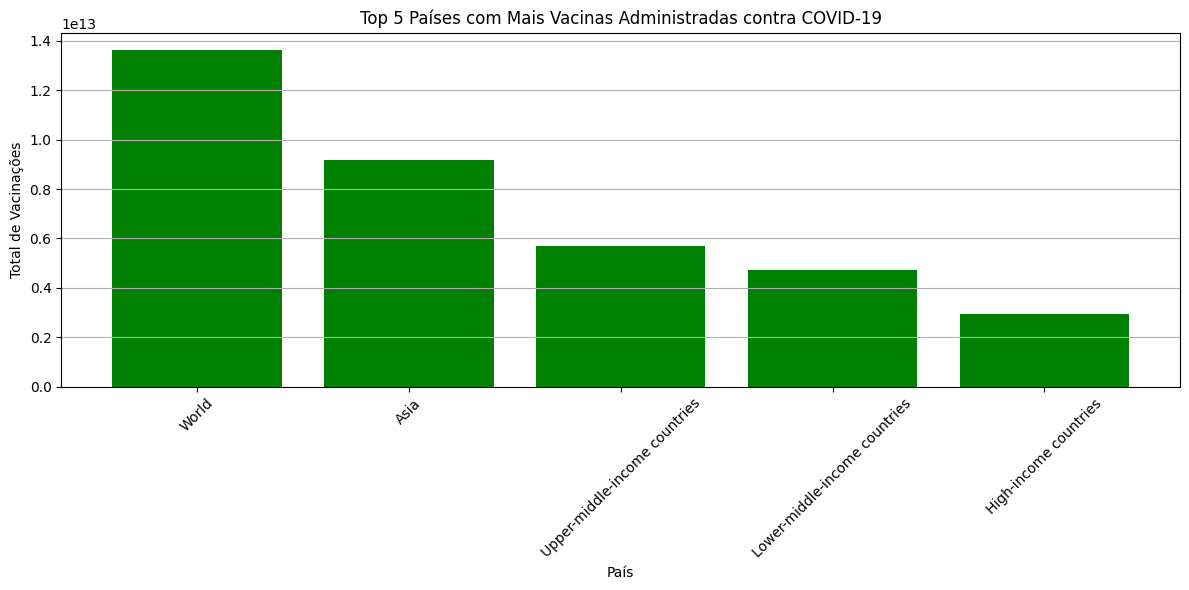

In [40]:
# Gráfico de Vacinações Totais
plt.figure(figsize=(12, 6))
plt.bar(top_vaccinations['location'], top_vaccinations['total_vaccinations'], color='green')
plt.title('Top 5 Países com Mais Vacinas Administradas contra COVID-19')
plt.xlabel('País')
plt.ylabel('Total de Vacinações')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### • Como está a evolução de casos e mortes no Brasil em comparação com o mundo?

In [ ]:
df_brasil_cases.info()

In [ ]:
print(df_brasil_cases.columns)


In [42]:
# Agrupar por estado e somar casos e mortes
state_stats = df_brasil_cases.groupby('state').agg({
    'totalCases': 'sum',
    'deaths': 'sum'
}).reset_index()



In [43]:
# Classificar por casos totais
top_cases = state_stats.sort_values(by='totalCases', ascending=False).head(5)

# Classificar por mortes totais
top_deaths = state_stats.sort_values(by='deaths', ascending=False).head(5)


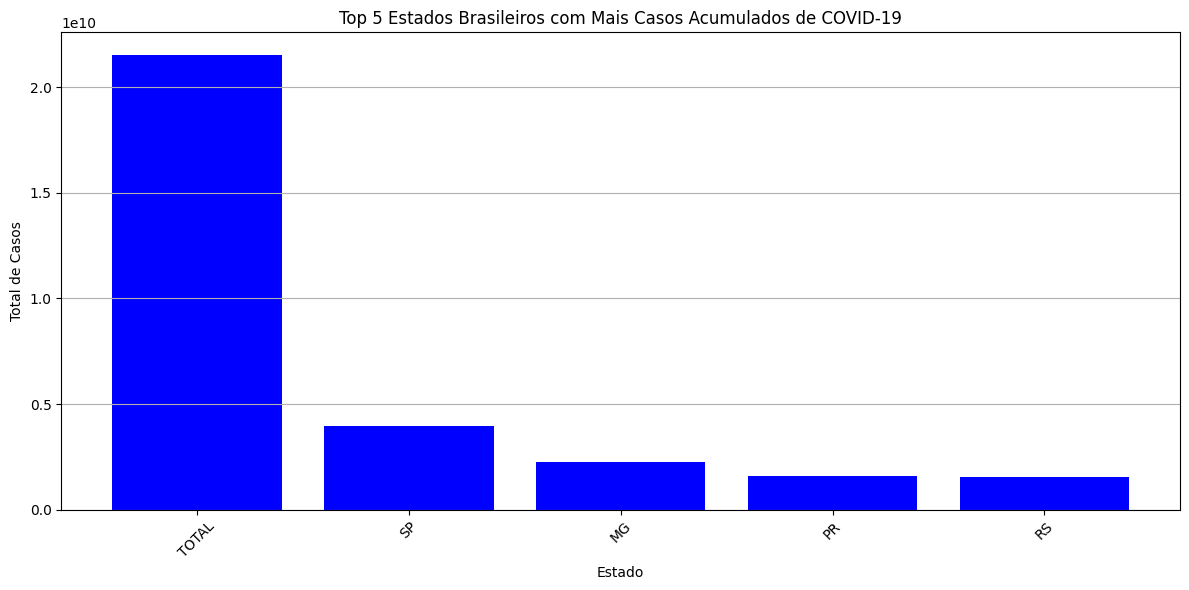

In [44]:
# Gráfico de Casos Totais
plt.figure(figsize=(12, 6))
plt.bar(top_cases['state'], top_cases['totalCases'], color='blue')
plt.title('Top 5 Estados Brasileiros com Mais Casos Acumulados de COVID-19')
plt.xlabel('Estado')
plt.ylabel('Total de Casos')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


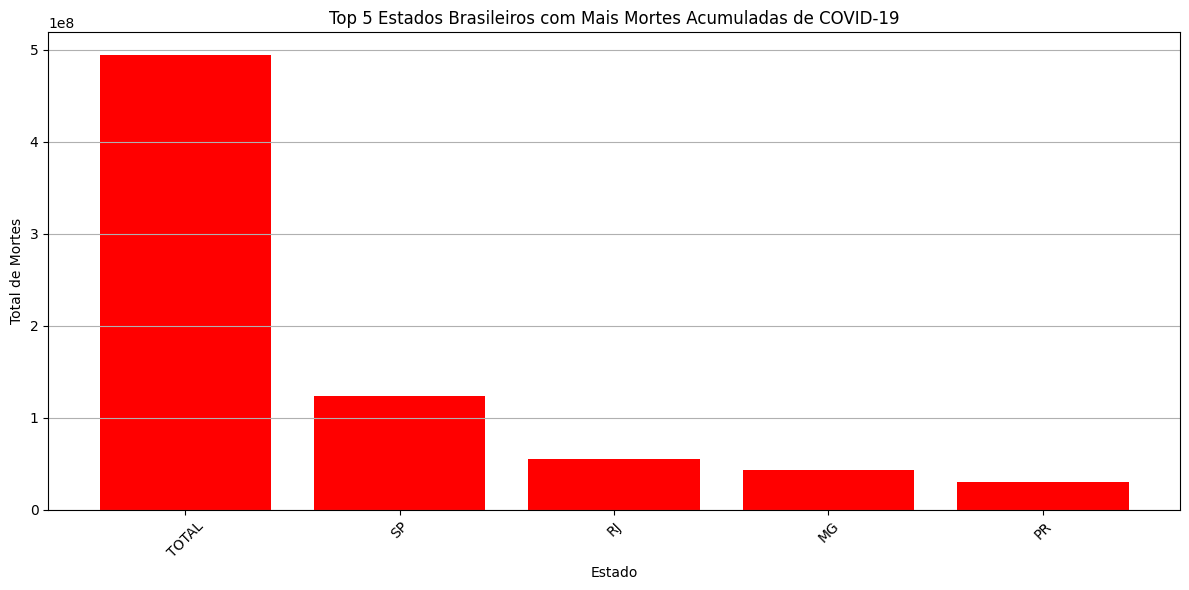

In [45]:
# Gráfico de Mortes Totais
plt.figure(figsize=(12, 6))
plt.bar(top_deaths['state'], top_deaths['deaths'], color='red')
plt.title('Top 5 Estados Brasileiros com Mais Mortes Acumuladas de COVID-19')
plt.xlabel('Estado')
plt.ylabel('Total de Mortes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### • Quais são os 5 estados brasileiros com mais casos e mortes acumuladas?

In [46]:
# Agrupar por estado e somar casos e mortes
state_stats = df_brasil_cases.groupby('state').agg({
    'totalCases': 'sum',
    'deaths': 'sum'
}).reset_index()


In [47]:
# Classificar por casos totais
top_cases = state_stats.sort_values(by='totalCases', ascending=False).head(5)

# Classificar por mortes totais
top_deaths = state_stats.sort_values(by='deaths', ascending=False).head(5)


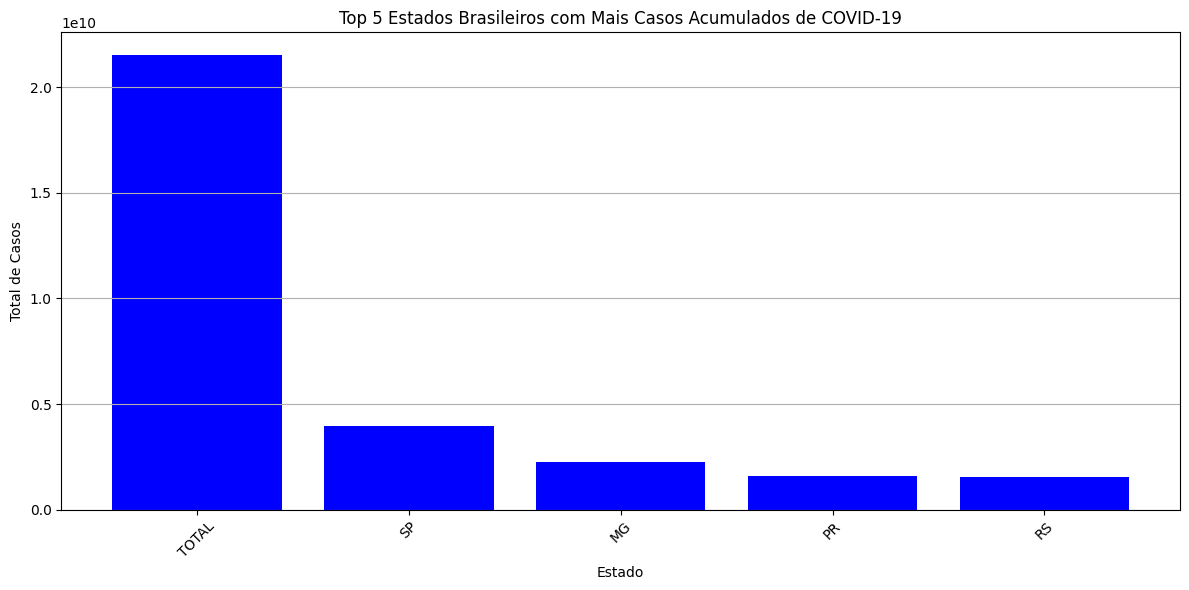

In [48]:
# Gráfico de Casos Totais
plt.figure(figsize=(12, 6))
plt.bar(top_cases['state'], top_cases['totalCases'], color='blue')
plt.title('Top 5 Estados Brasileiros com Mais Casos Acumulados de COVID-19')
plt.xlabel('Estado')
plt.ylabel('Total de Casos')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

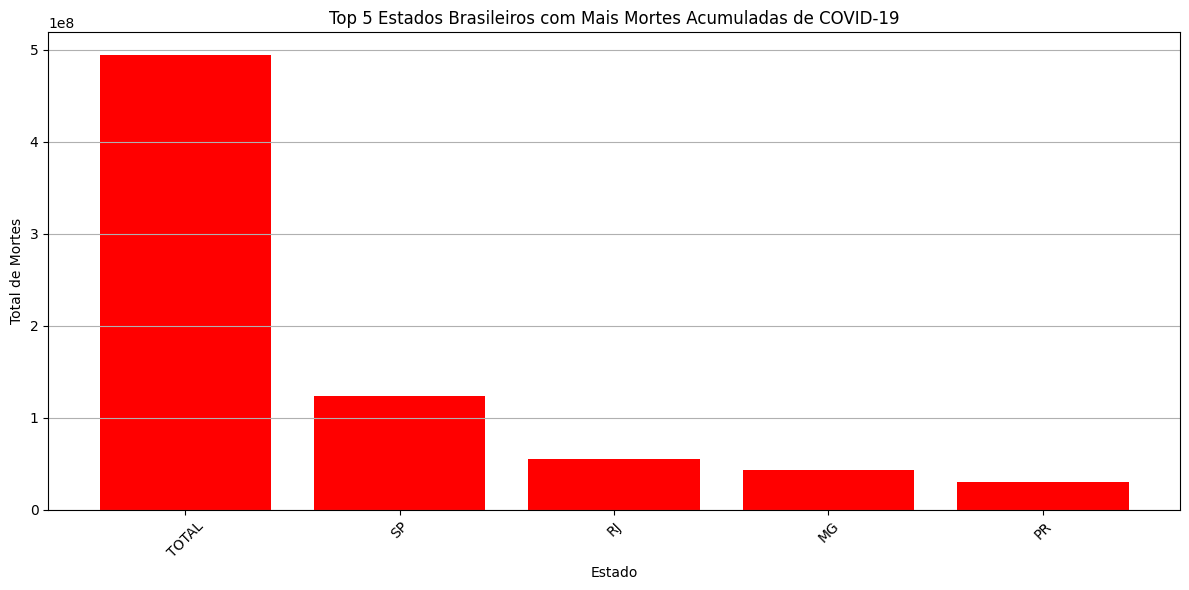

In [49]:
# Gráfico de Mortes Totais
plt.figure(figsize=(12, 6))
plt.bar(top_deaths['state'], top_deaths['deaths'], color='red')
plt.title('Top 5 Estados Brasileiros com Mais Mortes Acumuladas de COVID-19')
plt.xlabel('Estado')
plt.ylabel('Total de Mortes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Exploração de diferentes tipos de gráficos:

### • Justifique a utilização de cada gráfico. 


## Justificativa para a Utilização de Gráficos
### Gráficos de Barras
Uso: Ideal para comparar categorias discretas, como estados ou países.\
Justificativa: Os gráficos de barras permitem uma visualização clara e imediata das quantidades relativas. Eles são eficazes para destacar diferenças entre os totais acumulados de casos ou mortes entre os estados.\
Interpretação: A altura das barras facilita a comparação visual e rápida das quantidades.\
### Gráficos de Linha
Uso: Melhor para mostrar a evolução de dados ao longo do tempo.\
Justificativa: Os gráficos de linha são ótimos para observar tendências, padrões sazonais ou flutuações ao longo do tempo. Eles permitem ver como os casos ou mortes mudam, revelando a dinâmica da pandemia.\
Interpretação: As linhas conectam os pontos de dados, facilitando a visualização das variações e tendências ao longo do tempo.


### • Pelo menos duas perguntas devem testar diferentes tipos de gráficos para a mesma análise (por exemplo, comparar gráficos de linha com gráficos de barras). Explicar como a escolha do tipo de gráfico influencia a interpretação dos dados e se há algum tipo de visualização que seja mais adequado para responder à pergunta proposta.

## Evolução dos Casos de COVID-19

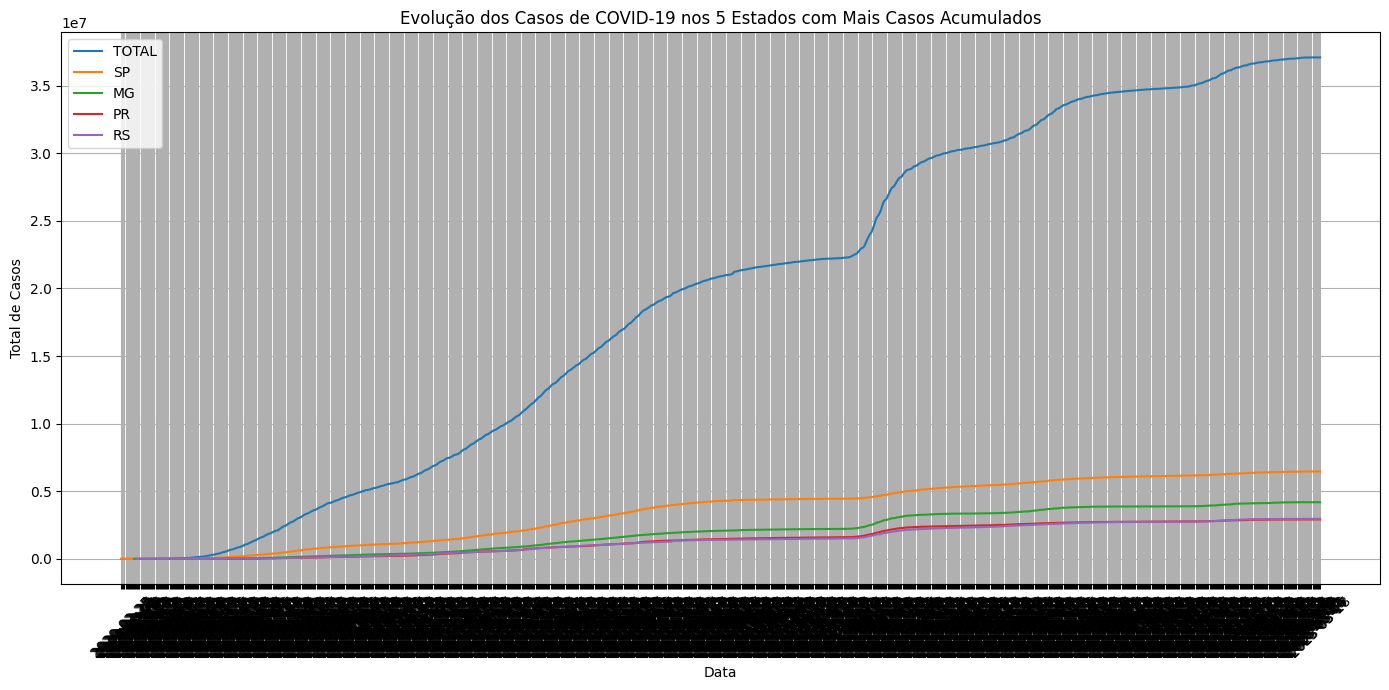

In [50]:
import matplotlib.pyplot as plt

# Filtrar os dados para os 5 estados com mais casos acumulados
top_states = state_stats.sort_values(by='totalCases', ascending=False).head(5)
states_to_plot = top_states['state'].values

# Filtrar o DataFrame original para os estados selecionados
df_top_states = df_brasil_cases[df_brasil_cases['state'].isin(states_to_plot)]

# Criar um gráfico de linha
plt.figure(figsize=(14, 7))
for state in states_to_plot:
    subset = df_top_states[df_top_states['state'] == state]
    plt.plot(subset['date'], subset['totalCases'], label=state)

plt.title('Evolução dos Casos de COVID-19 nos 5 Estados com Mais Casos Acumulados')
plt.xlabel('Data')
plt.ylabel('Total de Casos')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [51]:
# Agrupar por mês para ver a evolução em períodos
df_brasil_cases['month'] = df_brasil_cases['date'].dt.to_period('M')
monthly_cases = df_brasil_cases[df_brasil_cases['state'].isin(states_to_plot)].groupby(['month', 'state']).agg({'totalCases': 'sum'}).reset_index()

# Criar um gráfico de barras
plt.figure(figsize=(14, 7))
for state in states_to_plot:
    subset = monthly_cases[monthly_cases['state'] == state]
    plt.bar(subset['month'].astype(str), subset['totalCases'], label=state)

plt.title('Total de Casos de COVID-19 por Mês nos 5 Estados com Mais Casos Acumulados')
plt.xlabel('Mês')
plt.ylabel('Total de Casos')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


AttributeError: Can only use .dt accessor with datetimelike values